In [674]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [675]:
neutral_tweets = pd.read_csv("split_data/neutral_tweets.csv")
biden_tweets_more = pd.read_csv("split_data/biden_tweets_more.csv")
biden_tweets_less = pd.read_csv("split_data/biden_tweets_less.csv")
trump_tweets_more = pd.read_csv("split_data/trump_tweets_more.csv")
trump_tweets_less = pd.read_csv("split_data/trump_tweets_less.csv")

In [677]:
final = pd.DataFrame()
temp_df  = neutral_tweets.copy()

In [678]:
topics = [
"women|army|military",
"immigration",
"climate change", 
"abortion",
"lgbtq",
"death|penalty",
"student|loan",
"gun",
"marijuana"]

In [679]:
d = {}
overall_average_list = []
for topic in topics:
    loop_df = temp_df[temp_df['cleaned_tweets'].str.contains(topic, case=False, na=False)]
    overall_average = np.mean(loop_df["sentiment"])
    overall_average_list.append(overall_average)
    if len(loop_df) == 0:
        pos_av = 0
        neg_av = 0
    else:
        positive =  loop_df[loop_df["sentiment"]>=0]
        negative =  loop_df[loop_df["sentiment"]<0]
        
        pos_av = np.mean(positive["sentiment"])
        neg_av = np.mean(negative["sentiment"])

        if len(positive) == 0:
           pos_av= 0 
        if len(negative) == 0:
           neg_av= 0
    
        
    d[topic] = [pos_av, neg_av]
    
df = pd.DataFrame(d)
df = df.rename(index={0: "positive", 1: "negative"})
df

,women|army|military,immigration,climate change,abortion,lgbtq,death|penalty,student|loan,gun,marijuana
positive,0.467701,0.194994,0.000000,0.152132,0.548207,0.000000,0.045759,0.294422,0.000000
negative,-0.748323,-0.480454,-0.958696,-0.876910,-0.758343,-0.889399,-0.295765,-0.664710,-0.187672


In [685]:
df_transposed = df.transpose()
df_transposed = df_transposed.reset_index()
df_transposed["category"] = df_transposed["index"]
df_transposed = df_transposed[["positive", "negative", "category"]]

In [686]:
df_transposed_new = pd.DataFrame(np.repeat(df_transposed.values, 2, axis=0))
df_transposed_new.columns = df_transposed.columns
df_transposed_new["idx"] = range(len(newdf))
df_transposed_new

,positive,negative,category,idx
0,0.467701,-0.748323,women|army|military,0
1,0.467701,-0.748323,women|army|military,1
2,0.194994,-0.480454,immigration,2
3,0.194994,-0.480454,immigration,3
4,0.0,-0.958696,climate change,4
5,0.0,-0.958696,climate change,5
6,0.152132,-0.87691,abortion,6
7,0.152132,-0.87691,abortion,7
8,0.548207,-0.758343,lgbtq,8
9,0.548207,-0.758343,lgbtq,9


In [687]:
value = []
sentiment= []
for index, row in df_transposed_new.iterrows():
    
    if index % 2 == 0: 
        value.append(row["positive"])
        sentiment.append('positive sentiment')
    else:
        value.append(row["negative"])
        sentiment.append('negative sentiment')
    

df_transposed_new["strength of sentiment"] = value
df_transposed_new["sentiment"] = sentiment
df_transposed_new = df_transposed_new[["idx", "strength of sentiment", "sentiment", "category"]]
df_transposed_new

,idx,strength of sentiment,sentiment,category
0,0,0.467701,positive sentiment,women|army|military
1,1,-0.748323,negative sentiment,women|army|military
2,2,0.194994,positive sentiment,immigration
3,3,-0.480454,negative sentiment,immigration
4,4,0.000000,positive sentiment,climate change
5,5,-0.958696,negative sentiment,climate change
6,6,0.152132,positive sentiment,abortion
7,7,-0.876910,negative sentiment,abortion
8,8,0.548207,positive sentiment,lgbtq
9,9,-0.758343,negative sentiment,lgbtq


In [689]:
replacements = [("women|army|military", "women in combat"),
               ("gun", "gun control"), 
               ("student|loan", "student loans"), 
               ("marijuana", "marijuana legalization"), 
               ("lgbtq", "LGBTQ+ rights"), 
               ("death|penalty", "death penalty"), 
               ]
for i in replacements: 
    curr = i[0]
    new = i[1]
    df_transposed_new = df_transposed_new.replace(curr, new)


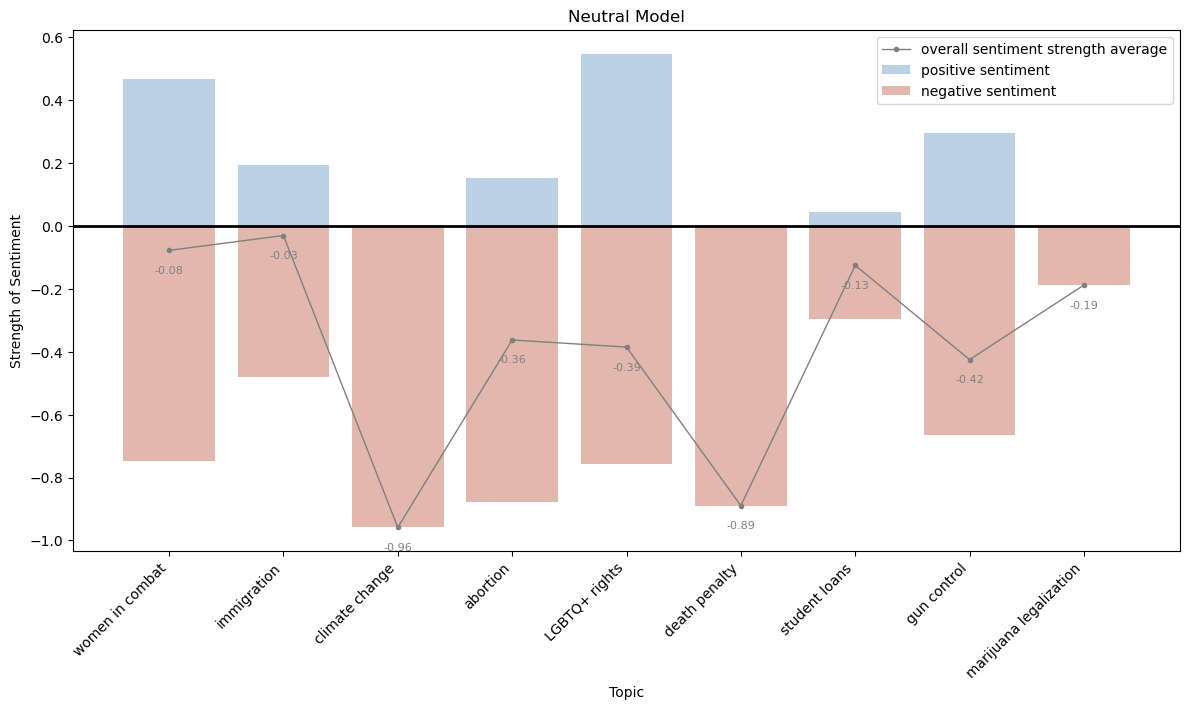

In [690]:

plt.figure(figsize=(12,7))
custom_palette = {'positive sentiment': '#b6d1ed', 'negative sentiment': '#ebb1a4'}
data = df_transposed_new
ax = sns.barplot(data=data, x='category', y='strength of sentiment', hue='sentiment', dodge=False, palette=custom_palette)
ax.axhline(0, lw=2, color='black')
x_coords = range(len(overall_average_list))
plt.plot(x_coords, overall_average_list, color='gray', marker='o', linestyle='-', linewidth=1, markersize=3, label='overall sentiment strength average')

offset = 0.08  
for x, y in zip(x_coords, overall_average_list):
    va = 'bottom' if y < 0 else 'top'
    y_offset = y - offset if y < 0 else y + offset
    plt.text(x, y_offset, '{:.2f}'.format(y), color='gray', ha='center', va=va, label='Overall Average', fontsize = 8)
ax.legend()

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")  # Adjust label alignment if necessary
plt.tight_layout()
plt.title("Neutral Model")
plt.xlabel("Topic")
plt.ylabel("Strength of Sentiment")
plt.show()


In [1]:
print("sentiment_analyhsis_viz_creation.ipynb finished running")

sentiment_analyhsis_viz_creation.ipynb finished running
